# <center>Фреймворки для глубокого обучения</center>
### Линейная классификация
Представьте, что у нас есть признаки $x = (x_1, x_2)$ и выборка положительных и отрицательных точек $y ∈ \{+1, −1\}$.

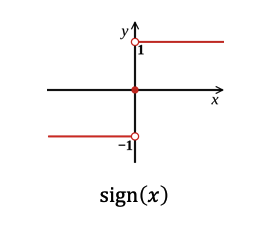

Нам нужно найти разделяющую гиперплоскость между ними. В данном случае это просто линия, которая задаётся тремя коэффициентами:
$$ d(x) = w_0 + w_1x_1 + w_2x_2 $$
Нам нужно найти три коэффициента $w$, которые зададут линию. Далее мы можем взять точку $х$ и понять, где она находится относительно линии — выше или ниже. Для этого мы должны узнать знак линейной комбинации. Вектор весов $w$ задаёт нормаль к нашей линии, то есть он перпендикулярен ей (фиолетовый вектор на графике ниже).

**Линейная комбинация** — это скалярное произведение и длина проекции какого-нибудь другого вектора на наш вектор $w$.

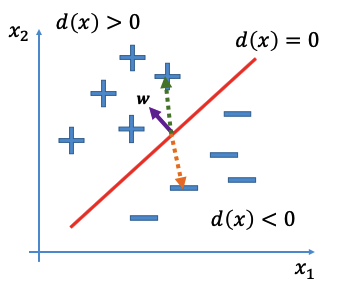

Поэтому проекция становится разных знаков. Из этих соображений мы делаем линейный классификатор. Наш алгоритм:

$$ a(x) = \text{sign}(d(x)) $$

Здесь появляется знак нашей линейной комбинации. Настроить линейный классификатор — значит найти эти коэффициенты.

### Логистическая регрессия
Она тоже решает задачу классификации, но в конце применяется не функция знака, а **сигмоидная функция**. Она превращает длину проекции в уверенность.

Уверенность и неуверенность появляется из-за краевых эффектов: на границе классов может быть какой-то шум, и в классификации точек, которые находятся рядом с красной разделяющей линией, мы не очень уверены.

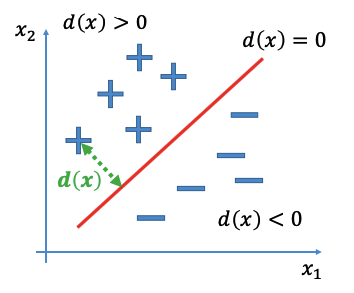

Если мы уходим далеко от линии вглубь классов, то предполагается, что мы более уверены в этом предсказании. Сигмоида делает именно это — превращает длину проекции линейной комбинации в уверенность.

Сигмоида устроена неслучайным образом:

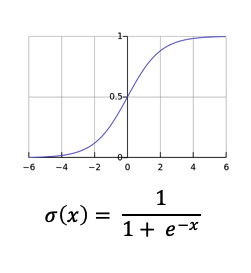

Если длина проекции 0 (точка ровно на красной линии), то сигмоида даёт 0.5. Логистическая регрессия предсказывает вероятность положительного класса. Вероятность отрицательного будет равна единица минус предсказанная вероятность положительного класса.

#### Другой пример
Представим, что у нас есть следующая задача:

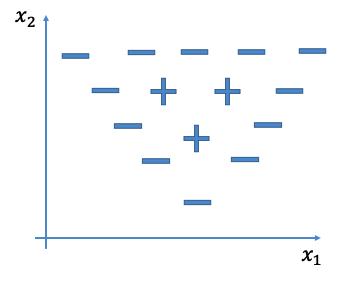

Чтобы решить подобную задачу, мы можем «подпереть» треугольник тремя линиями и создать алгоритм, используя только логистическую регрессию.

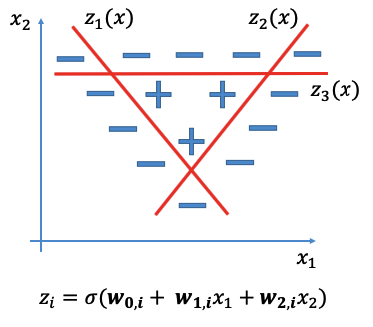

Все коэффициенты мы получили практически вручную. Сейчас у нас есть коэффициенты трёх логистических регрессий, каждая из которых решает свою маленькую подзадачу. 

Теперь возьмём какую-нибудь точку и посмотрим, какие три предсказания дают эти линии в точке:

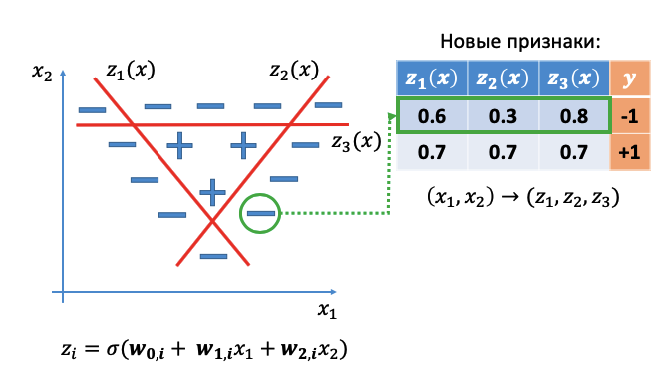

В координатах $х_1$ и $х_2$ эта задача не решается, поэтому полученные коэффициенты мы можем рассматривать как новые координаты.

Получим три признака, каждый из которых говорит, где мы находимся относительно каждой стороны треугольника.

Давайте возьмём наш целевой признак $y$, добавим его в новую таблицу, где находятся новые признаки с предсказаниями, и попробуем решить задачу с новыми признаками с помощью линейной логистической регрессии. На новой выборке получим логистическую регрессию:

$$ a(x) = \sigma(w_0 + w_1z_1(x) + w_2z_2(x) + w_3z_3(x)) $$

Теперь она даёт нам некоторые коэффициенты и взвешивает уже не признаки, а предсказания. То, что мы получили — простейшая нейросеть. 



## <center>Граф вычислений</center>
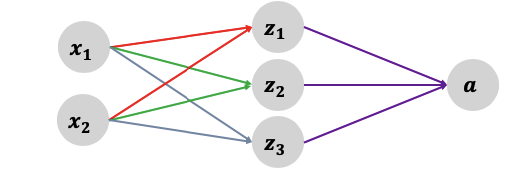

Граф соответствует комбинации наших функций. Такой граф называют **многослойным персептроном (MLP)**, и здесь уже можно видеть некоторые слои:
* входной слой (признаки);
* скрытый слой (нейроны);
* выходной слой (предсказания).
#### НЕЛИНЕЙНОСТИ В НЕЙРОНАХ 
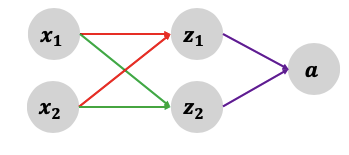

Если нелинейности убрать, то на этом примере видно, что наша модель станет очень простой: мы можем подставить выражения для $z_1$ и $z_2$ в нашу модель $a$. Мы можем раскрыть скобки, привести подобные слагаемые и всё, что мы получим — линейную комбинацию $x_1$ и $x_2$. При этом модель не становится сложнее.

$$ a = (w_1w_{1, 1} + w_2w_{1, 2})x_1 + (w_2w_{2, 1} + w_2w_{2, 2})x_2 $$
## <center>MLP
*MLP* — это простейший пример нейросети:

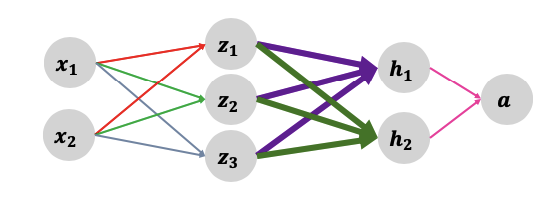

Слои в MLP называют:
* *Dense layer* (плотный);
* *Fully-connected layer* (полносвязный).

Архитектура MLP:
* количество слоёв;
* количество нейронов в каждом слое;
* функция активации, которую будем использовать.

## <center>TensorFlow
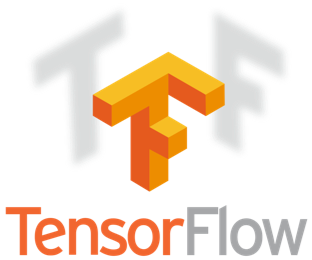

Основа вычислений в *TF* — граф. Каждая вершина графа — это одна операция, у которой есть входы и выходы.
* Вход любой операции — это набор тензоров (многомерных массивов).
* Выход любой операции — это тоже набор тензоров.

А у нас целый граф операций, между которыми перекидываются тензоры.

## <center>Градиетный спуск
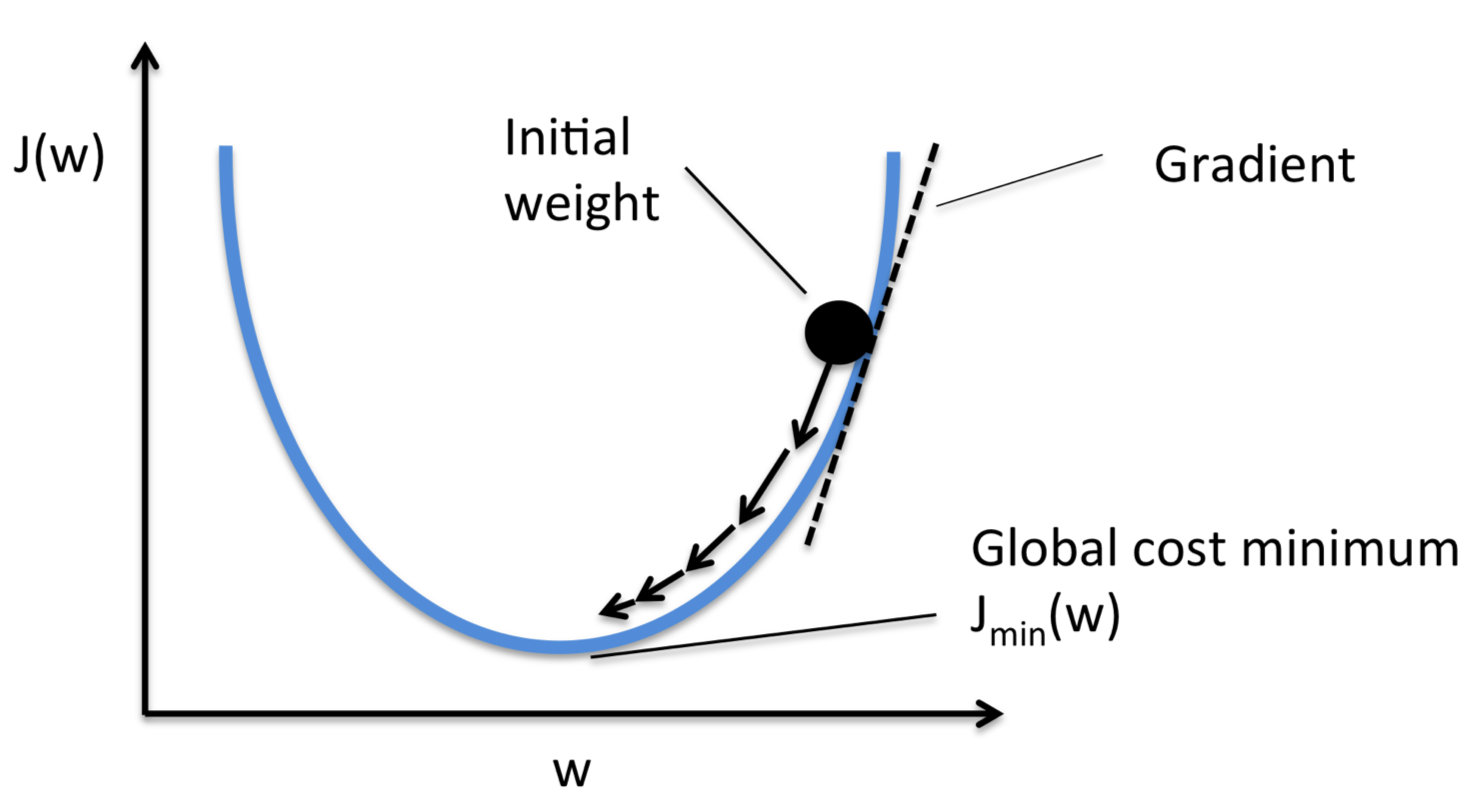

Функция потерь обычно дифференцируемая. Если представить, что у нас есть параметр $w$, который нужно оптимизировать, то мы можем начать с любой точки (*initial weight*) и посчитать в ней производную. В данном случае это тангенс наклона касательной.

### Цепное правило дифференцирования
$$ h(x) = f(x)g(x) $$
$$ \frac{\partial h}{\partial x} = g \frac{\partial f}{\partial x} + f \frac{\partial g}{\partial x} $$

### Граф для вычисления производных
Граф для вычисления нашей композиции: 

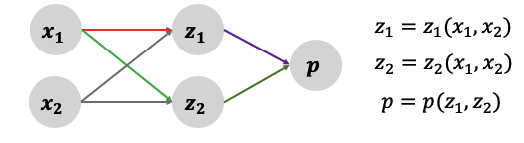

Построим из него граф из производных:

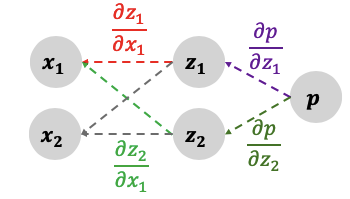

Каждому ребру приписана производная начала по концу. Можно догадаться, как работает цепное правило:

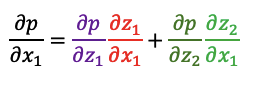

### Алгоритм вычисления производной в графе
Как посчитать производную $a$ по $b$:
* находим непосещённый путь из $a$ в $b$;
* перемножаем значения на рёбрах в пути;
* добавляем в сумму;
* возвращаемся к п.1.

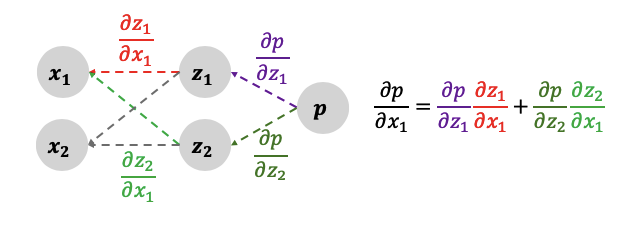

## <center>Граф производных на примере одного нейрона
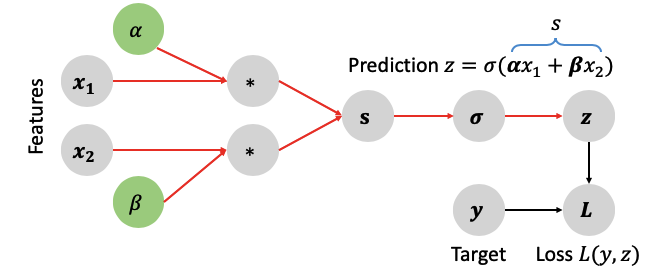

Рассмотрим, из чего он состоит по порядку:
* $x_1$, $x_2$ — признаки, то, что подаётся на вход (плейсхолдеры);
* $\alpha, \beta$ — веса модели (переменные);
* \* — операции произведения (после идёт подсчёт суммы);
* $s$ — применяем сигмоиду;
* $z$ — записываем в новую переменную;
* $L$ — функция потерь, которая берёт на вход правильные ответы $y$, предсказанные ответы $z$ и говорит, насколько они близки друг к другу;
* $y$ — плейсхолдер, правильный ответ.

Производные функции нам нужны, чтобы узнать, как нужно изменить $\alpha$ и $\beta$, чтобы минимизировать наши потери: 

$$ \frac{\partial L}{\partial \alpha}, \frac{\partial L}{\partial \beta} $$
Для того чтобы взять производную, мы переворачиваем наш граф:

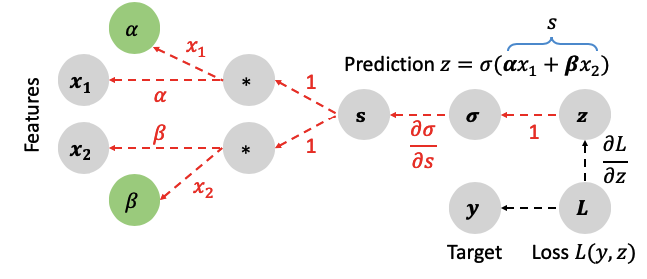

Для каждой стрелочки считаем производную. По сути нам нужно найти обратный путь от $L$ до $\alpha$:
$$ \frac{\partial L}{\partial \alpha} = \frac{\partial L}{\partial z} \frac{\partial \sigma}{\partial s}x_1 $$
Так же считается и по $\beta$:
$$ \frac{\partial L}{\partial \beta} = \frac{\partial L}{\partial z} \frac{\partial \sigma}{\partial s}x_2 $$

Эффективный способ вычисления всех производных называется **backpropagation** (обратное распространение ошибки):

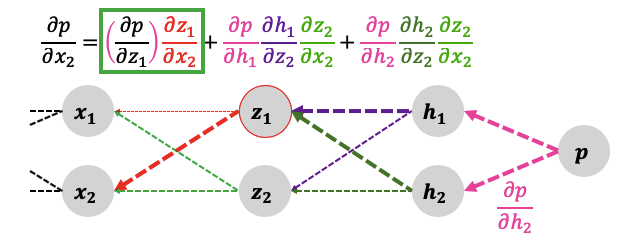

В *backpropogation* есть два прохода: прямой и обратный. Те производные, которые считает обратный граф, нужно считать в определённой точке. Именно для этого нужен прямой проход — он рассчитает аргументы всех этих производных:

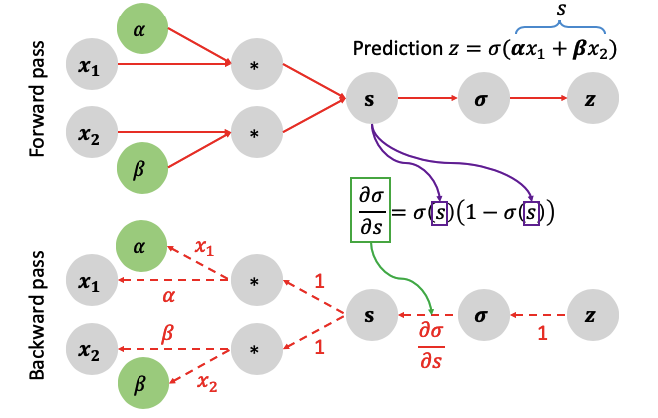

Мы не можем инициализировать нулями. 

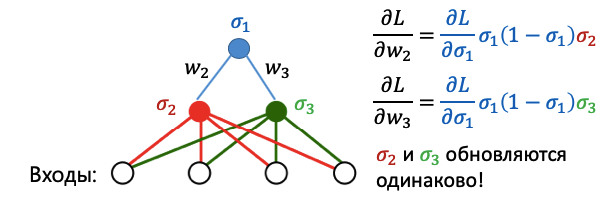

Если на данном примере мы стартуем на нулевых весах, то $w_2$ и $w_3$ будут обновляться симметрично, а значит, мы не научим никакую сложную комбинацию за счёт простоты сети. Это называют симметрией. 

Чтобы сломать симметрию, мы можем использовать случайный шум. 

